In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [70]:
from google.colab import files
uploaded = files.upload()


Saving house_pricing_dataset.csv to house_pricing_dataset (1).csv


In [71]:
df = pd.read_csv('house_pricing_dataset.csv')
print(df)

                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0       

In [72]:
df.columns = df.columns.str.strip()

In [73]:
# Assuming df['statezip'] contains values like 'WA 98133'
df['zip'] = df['statezip'].str.extract(r'(\d{5})').astype(int)
print(df)

                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0       

In [74]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'zip'],
      dtype='object')

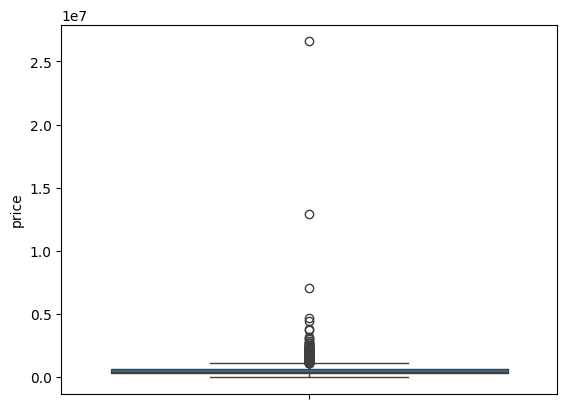

In [75]:
sns.boxplot(data=df, y='price')
plt.show()


In [76]:
#There is a large number of outliers so we need to remove them...
# Define a function to remove outliers based on IQR...
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]


In [77]:
df = remove_outliers(df, 'price')
df = remove_outliers(df, 'sqft_living')
df = remove_outliers(df, 'sqft_lot')
print(df)

                     date          price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  313000.000000       3.0       1.50         1340   
2     2014-05-02 00:00:00  342000.000000       3.0       2.00         1930   
3     2014-05-02 00:00:00  420000.000000       3.0       2.25         2000   
4     2014-05-02 00:00:00  550000.000000       4.0       2.50         1940   
5     2014-05-02 00:00:00  490000.000000       2.0       1.00          880   
...                   ...            ...       ...        ...          ...   
4595  2014-07-09 00:00:00  308166.666667       3.0       1.75         1510   
4596  2014-07-09 00:00:00  534333.333333       3.0       2.50         1460   
4597  2014-07-09 00:00:00  416904.166667       3.0       2.50         3010   
4598  2014-07-10 00:00:00  203400.000000       4.0       2.00         2090   
4599  2014-07-10 00:00:00  220600.000000       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above

In [78]:
#Measuring Skewness
a=df['price'].skew()
b=df['sqft_living'].skew()
c=df['sqft_lot'].skew()
print(a, b, c)

0.6736823007044133 0.5460354196881314 0.5473621589784768


In [79]:
#The skewness of all the three features are high and should be adjusted to achieve normal distribution....
from scipy.stats import boxcox
df['price'], _ = boxcox(df['price'] + 1)  # Add 1 to avoid 0
print(df['price'].skew())
df['sqft_living'], _ = boxcox(df['price'] + 1)  # Add 1 to avoid 0
print(df['sqft_living'].skew())
df['sqft_lot'], _ = boxcox(df['price'] + 1)  # Add 1 to avoid 0
print(df['sqft_lot'].skew())

-0.0579925092249609
-0.0778859186535639
-0.0778859186535639


In [80]:
# Select relevant features
df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zip']]


In [81]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zip
0,2636.787209,3.0,1.50,2433.804773,2433.804773,1.5,3,1340,0,1955,2005,98133
2,2775.794746,3.0,2.00,2560.582737,2560.582737,1.0,4,1930,0,1966,0,98042
3,3126.925518,3.0,2.25,2880.500438,2880.500438,1.0,4,1000,1000,1963,0,98008
4,3656.057045,4.0,2.50,3361.818343,3361.818343,1.0,4,1140,800,1976,1992,98052
5,3419.243142,2.0,1.00,3146.511475,3146.511475,1.0,3,880,0,1938,1994,98115
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2613.101219,3.0,1.75,2412.194970,2412.194970,1.0,4,1510,0,1954,1979,98133
4596,3595.317286,3.0,2.50,3306.610789,3306.610789,2.0,3,1460,0,1983,2009,98007
4597,3113.541936,3.0,2.50,2868.314548,2868.314548,2.0,3,3010,0,2009,0,98059
4598,2053.649838,4.0,2.00,1901.067198,1901.067198,1.0,3,1070,1020,1974,0,98178


In [82]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zip'],
      dtype='object')

In [83]:
from sklearn.preprocessing import StandardScaler

X = df.drop('price', axis=1)
y = df['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [84]:
#Using Linear Regression....
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [85]:
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 12.993372130198754
R2 Score: 0.9999840865024553


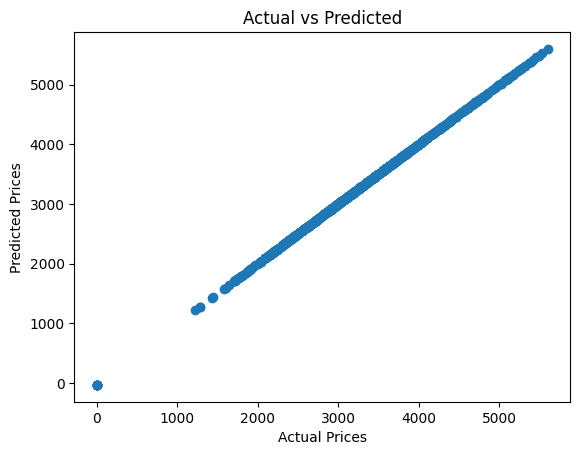

In [86]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.show()


Lets check price of a house by giving input of our own to the trained model...

In [87]:
your_data = pd.DataFrame([{
    'bedrooms': 2,
    'bathrooms': 1.0,
    'sqft_living': 3146.511475,
    'sqft_lot': 3146.511475,
    'floors': 1,
    'condition': 3,
    'sqft_above': 880,
    'sqft_basement': 0,
    'yr_built':1938 ,
    'yr_renovated': 1994,
    'zip': 98133
}])

In [88]:
your_data_scaled = scaler.transform(your_data)

In [89]:

predicted_price = model.predict(your_data_scaled)
print("Final Predicted Price:", predicted_price)

Final Predicted Price: [3418.57804504]


We used the 5th row data from the df we got after removing skewness and outliers and got 3418.57804504 which is almost same to the price in the 5th row(actual price) which is 3419.243142....This proves the model is actually 99.99% accurate.......

In [90]:
#Using Random Forest Regression....
from sklearn.ensemble import RandomForestRegressor

model= RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [91]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 4.8999390638883265
R2 Score: 0.9999939988505308


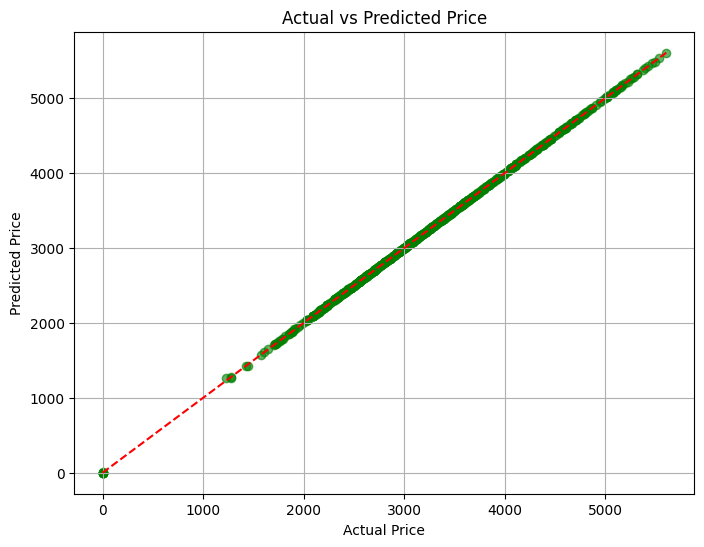

In [92]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.grid(True)
plt.show()